In [1]:
# import numpy as np
# from matplotlib import pyplot as plt
# from mdtraj.utils import timing
# #from msmbuilder.example_datasets import load_doublewell
# #from msmbuilder.example_datasets import load_doublewell_Gauss
# #from msmbuilder.example_datasets import load_doublewell_Quart
# #from msmbuilder.cluster import NDGrid
# #from msmbuilder.msm import BayesianMarkovStateModel, MarkovStateModel
# #from msmbuilder.msm import implied_timescales

# import mdtraj as md

# import numpy as np
# import pyemma
# from pyemma.coordinates.api import kmeans, regspace, uniform_time
# from pyemma.msm.analysis import eigenvalues, eigenvectors
# %matplotlib inline


import pyemma
pyemma.__version__

import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Populating the interactive namespace from numpy and matplotlib


/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# load the bin data
base_dir = ''
AA_dir = ''
dtraj_dir = ''
bin_dir = ''
#bin_ctrs = np.load(base_dir+'/'+AA_dir+'/'+bin_dir+'/'+'binctrs_50x50bins.dat.npy')
#print bin_ctrs

In [3]:
# load the traj data
#dtraj_AA = pyemma.msm.io.read_discrete_trajectory(base_dir+'/'+AA_dir+'/'+dtraj_dir+'/'+'dih_1-4_scatter.dat')
dtraj_AA = np.squeeze(np.load('../traj/dtraj_CG_1traj_dih_1-4.npy'))
print dtraj_AA.T[:]

[[ 179.49759316 -177.20243882 -178.12432791 ... -132.10934254
  -132.11088953 -135.11708449]
 [   0.960705      1.05407       1.013126   ...    0.946645
     0.945171      0.935668  ]]


In [4]:
#print dtraj_AA[:,1]

Nbins = 50

# ax0 = dih
min_ax0 = min(dtraj_AA[:,0])
max_ax0 = max(dtraj_AA[:,0])
print max_ax0
print min_ax0
centers_ax0 = np.linspace(min_ax0, max_ax0, num=Nbins)
print centers_ax0
# ax1 = 1-4
min_ax1 = min(dtraj_AA[:,1])
max_ax1 = max(dtraj_AA[:,1])
print max_ax1
print min_ax1
centers_ax1 = np.linspace(min_ax1, max_ax1, num=Nbins)
print centers_ax1

centers = [centers_ax0, centers_ax1]
print np.array(centers).shape

179.9997906647248
-179.99984796050427
[-179.99984796 -172.65291656 -165.30598516 -157.95905376 -150.61212236
 -143.26519096 -135.91825956 -128.57132816 -121.22439676 -113.87746536
 -106.53053396  -99.18360255  -91.83667115  -84.48973975  -77.14280835
  -69.79587695  -62.44894555  -55.10201415  -47.75508275  -40.40815135
  -33.06121995  -25.71428855  -18.36735715  -11.02042575   -3.67349435
    3.67343705   11.02036845   18.36729985   25.71423125   33.06116265
   40.40809405   47.75502546   55.10195686   62.44888826   69.79581966
   77.14275106   84.48968246   91.83661386   99.18354526  106.53047666
  113.87740806  121.22433946  128.57127086  135.91820226  143.26513366
  150.61206506  157.95899646  165.30592786  172.65285926  179.99979066]
1.128972
0.311915
[0.311915   0.32858963 0.34526427 0.3619389  0.37861353 0.39528816
 0.4119628  0.42863743 0.44531206 0.46198669 0.47866133 0.49533596
 0.51201059 0.52868522 0.54535986 0.56203449 0.57870912 0.59538376
 0.61205839 0.62873302 0.6454076

In [5]:
bin_ctrs = centers[:]
print len(dtraj_AA[:,0])
print dtraj_AA[:,1]
print len(bin_ctrs[0])
print bin_ctrs[0][1] - bin_ctrs[0][0]
print np.floor(bin_ctrs[0][2] - bin_ctrs[0][1])

1000000
[0.960705 1.05407  1.013126 ... 0.946645 0.945171 0.935668]
50
7.346931400514876
7.0


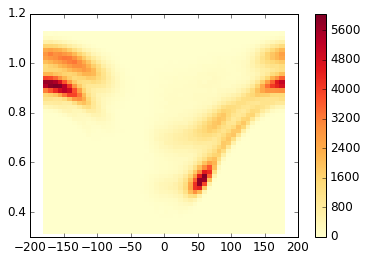

(51,)
(51,)
(50, 50)


In [6]:
# print the histogram of states
dist_AA, xEdges, yEdges = np.histogram2d(dtraj_AA[:,0], dtraj_AA[:,1], len(bin_ctrs[0]) )
#dist_AA,binEdges = np.histogram(dtraj_AA, len(bin_ctrs))
#intl = np.trapz(dist_AA,bin_ctrs)
#dist_AA = np.divide(dist_AA,intl)
#plt.plot(bin_ctrs,dist_AA,'--',linewidth=2.0,color='r')
plt.pcolor(xEdges,yEdges,dist_AA.T,cmap='YlOrRd')
plt.colorbar()
plt.show()

print xEdges.shape
print yEdges.shape
print dist_AA.shape

#plt.axis([-1.05, 1.05, 0.0, 1.2])
#plt.show()

In [7]:
ngridsx = len(bin_ctrs[0])
xmin = min(bin_ctrs[0])
dx = bin_ctrs[0][1] - bin_ctrs[0][0]
ngridsy = len(bin_ctrs[1])
ymin = min(bin_ctrs[1])
dy = bin_ctrs[1][1] - bin_ctrs[1][0]
dtraj_AA_labels = []
xgrid_traj = []
ygrid_traj = []
for i in range(0,len(dtraj_AA[:,0])):
    xgrid_traj.append( int(np.floor( (dtraj_AA[i,0] - xmin) / dx ) ) )
    ygrid_traj.append( int(np.floor( (dtraj_AA[i,1] - ymin) / dy ) ) )
    index = xgrid_traj[i] + ygrid_traj[i]*ngridsx
    dtraj_AA_labels.append(index)

In [8]:
# functions for transforming between bins and labels
def values_to_bins(x,y,xmin,ymin,dx,dy):
    xgrid = int( np.floor( (x - xmin) / dx ) ) 
    ygrid = int( np.floor( (y - ymin) / dy ) ) 
    return xgrid, ygrid

def bins_to_label(xgrid,ygrid,nx):
    label = xgrid + ygrid*nx 
    return label

def label_to_bins(label,nx):
    xgrid = label % nx
    ygrid = (label - xgrid) / nx
    return xgrid, ygrid

def bins_to_values(xgrid, ygrid, values):
    values_x = values[0][xgrid]
    values_y = values[1][ygrid]
    return values_x, values_y

In [9]:
tau = 3
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=False, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
print lcc_AA

False
[  23   24   73 ... 2446 2447 2448]


In [10]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)
#plt.pcolor(lcc_trim_AA,lcc_trim_AA,Cmat_AA_cc,cmap='Blues')
#plt.colorbar()
#plt.show()

#print xgrids_trim
#print ygrids_trim
#print bin_ctrs_x_trim
#print bin_ctrs_y_trim

In [11]:
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [12]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

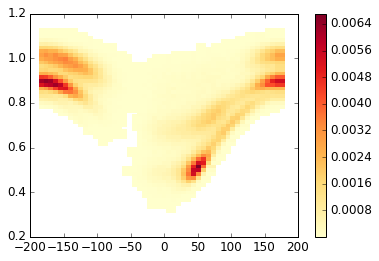

In [13]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()
#print bin_ctrs_x_trim
#print lcc_trim_AA.shape
#print bin_ctrs_y_trim.shape
#print pi_AA.shape

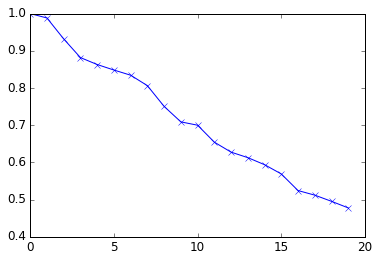

In [14]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')
#plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
#plt.colorbar()
#plt.show()


In [15]:
ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
print ts_est[1:5]
print len(dtraj_AA)

[84.63460474 14.19437587  7.94850009  6.79297753]
1000000


In [16]:
ts_f_tau = []
tau = np.linspace(1,20,20,dtype=int)
for lag in tau:
    Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, lag, sliding=True, sparse_return=False, nstates=None)
    lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)
    lcc_trim_AA = lcc_AA[:]
    minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
    nrem = 0
    for i in range(0,lcc_AA.size):
        shift = i - nrem
        if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
            Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
            lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
            nrem += 1
    lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
    Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
    lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]
    T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)
    ts_est = pyemma.msm.analysis.dense.decomposition.timescales(T_AA)
    ts_f_tau.append(ts_est[1:5])
ts_f_tau = np.array(ts_f_tau)

In [17]:
print ts_f_tau[0,:]
print ts_f_tau[:,0]
print ts_f_tau[:,:]

[539.73445955  85.54150214  49.61110505  39.83238655]
[539.73445955 168.08079367  84.10374472  52.81715744  37.76935798
  29.39341914  24.22934235  20.81532636  18.43653468  16.67626465
  15.33894802  14.30265663  13.47590297  12.80434271  12.25606745
  11.79738905  11.40187899  11.0594512   10.75994222  10.49740002]
[[539.73445955  85.54150214  49.61110505  39.83238655]
 [168.08079367  26.75359236  15.45735867  13.34270469]
 [ 84.10374472  14.12364745   7.93155147   6.78705426]
 [ 52.81715744   9.61557316   5.30645956   4.38195798]
 [ 37.76935798   7.54540735   4.07870482   3.20898446]
 [ 29.39341914   6.36981139   3.36939626   2.56279351]
 [ 24.22934235   5.60023997   2.92289226   2.21554588]
 [ 20.81532636   5.06965807   2.61824429   2.01160101]
 [ 18.43653468   4.7061541    2.3929343    1.85393109]
 [ 16.67626465   4.45746955   2.18986004   1.69707114]
 [ 15.33894802   4.27344118   2.02539272   1.56139383]
 [ 14.30265663   4.11868882   1.89600107   1.454477  ]
 [ 13.47590297   3.97

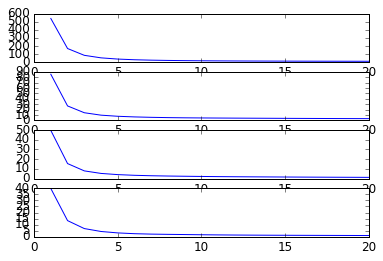

In [18]:
fig = plt.figure(1)
plt.subplot(4,1,1)
plt.plot(tau,ts_f_tau[:,0])
plt.subplot(4,1,2)
plt.plot(tau,ts_f_tau[:,1])
plt.subplot(4,1,3)
plt.plot(tau,ts_f_tau[:,2])
plt.subplot(4,1,4)
plt.plot(tau,ts_f_tau[:,3])

In [22]:
tau = np.linspace(1,50,20,dtype=int)
its_full = msm.timescales_msm(dtraj_AA_labels, lags=tau, nits=6)

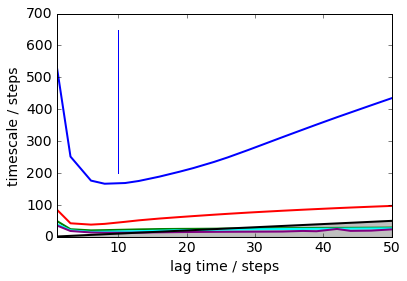

In [23]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its_full, ylog=False, units='steps', linewidth=2)
plt.plot(10.*np.ones(10),np.arange(10)*50+200)
#xlim(0, 10); ylim(0, 100);

In [24]:
tau = 10
Cmat_AA = pyemma.msm.estimation.count_matrix(dtraj_AA_labels, tau, sliding=True, sparse_return=False, nstates=None)
print pyemma.msm.estimation.is_connected(Cmat_AA, directed=True)
lcc_AA = pyemma.msm.estimation.largest_connected_set(Cmat_AA, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA, directed=True, lcc=lcc_AA)

False


In [25]:
#bin_ctrs_AA_cc = [bin_ctrs[i] for i in lcc_AA]
#bin_ctrs_AA_cc = np.array(bin_ctrs_AA_cc)
#print bin_ctrs
#print bin_ctrs_AA_cc

lcc_trim_AA = lcc_AA[:]
minsamp = np.sum(Cmat_AA_cc) / (100.0*lcc_AA.size)
nrem = 0
for i in range(0,lcc_AA.size):
    shift = i - nrem
    if ( np.sum(Cmat_AA_cc[shift]) < minsamp ): # trim from matrix and bins
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=0)
        Cmat_AA_cc = np.delete(Cmat_AA_cc, (shift), axis=1)
        lcc_trim_AA = np.delete(lcc_trim_AA, (shift))
        nrem += 1
        
lcc_AA_tmp = pyemma.msm.estimation.largest_connected_set(Cmat_AA_cc, directed=True)
Cmat_AA_cc = pyemma.msm.estimation.largest_connected_submatrix(Cmat_AA_cc, directed=True, lcc=lcc_AA_tmp)
lcc_trim_AA = lcc_trim_AA[lcc_AA_tmp]

xgrids_trim, ygrids_trim = label_to_bins(lcc_trim_AA,ngridsx)
bin_ctrs_x_trim, bin_ctrs_y_trim = bins_to_values(xgrids_trim, ygrids_trim, bin_ctrs)

In [26]:
T_AA, pi_AA = pyemma.msm.estimation.transition_matrix(Cmat_AA_cc, reversible=True, mu=None, return_statdist=True)

In [27]:
# save the model
np.save('T',T_AA)
np.save('mu',pi_AA)
np.save('tau',tau)
np.save('grids_trim',np.array([xgrids_trim,ygrids_trim]))
np.save('bin_ctrs_trim',np.array([bin_ctrs_x_trim,bin_ctrs_y_trim]))
np.save('lcc_trim',lcc_trim_AA)

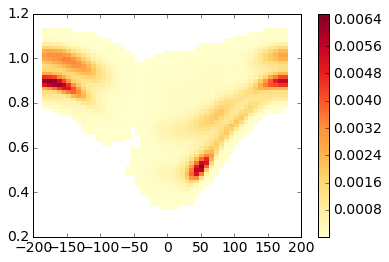

In [28]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=pi_AA,cmap='YlOrRd',marker='s',linewidth=0.0)
plt.colorbar()
plt.show()

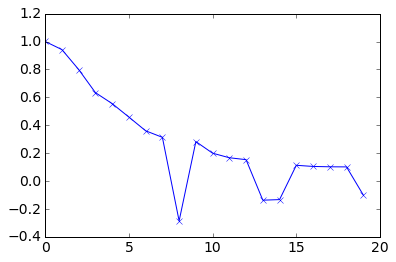

In [29]:
evals = eigenvalues(T_AA,k=20)
plt.plot(np.real(evals),marker='x')

In [30]:
evecs = eigenvectors(T_AA,k=20)

In [31]:
#print evecs[:,1]

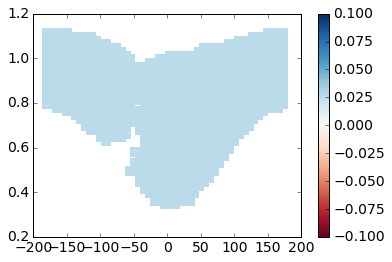

In [32]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,0],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

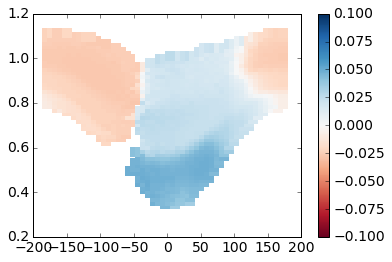

In [33]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,1],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

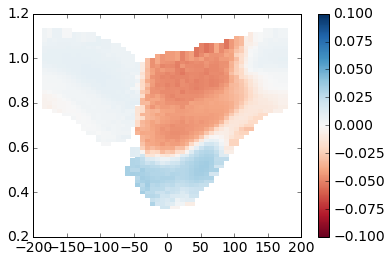

In [34]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,2],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

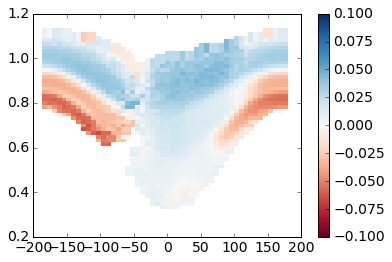

In [35]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,3],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

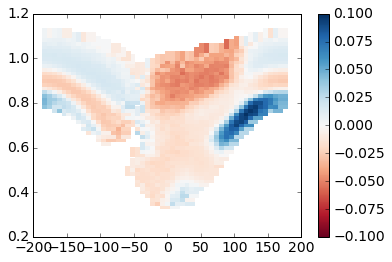

In [36]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=evecs[:,4],cmap='RdBu',marker='s',linewidth=0.0,vmin=-0.1,vmax=0.1)
plt.colorbar()
plt.show()

In [37]:
from pyemma.msm import PCCA

In [38]:
pcca=PCCA(T_AA, 4)

In [39]:
membership_crisp=np.where(pcca.memberships>0.5)

In [40]:
#print membership_crisp[0]
membership = pcca.memberships

In [41]:
#print list(set(t) - set(s))  bin_ctrs_x_trim
#print bin_ctrs_y_trim
centers = [np.sort(list(set(bin_ctrs_x_trim))),np.sort(list(set(bin_ctrs_y_trim)))]
print centers[0]
print centers[1]

[-179.99984796 -172.65291656 -165.30598516 -157.95905376 -150.61212236
 -143.26519096 -135.91825956 -128.57132816 -121.22439676 -113.87746536
 -106.53053396  -99.18360255  -91.83667115  -84.48973975  -77.14280835
  -69.79587695  -62.44894555  -55.10201415  -47.75508275  -40.40815135
  -33.06121995  -25.71428855  -18.36735715  -11.02042575   -3.67349435
    3.67343705   11.02036845   18.36729985   25.71423125   33.06116265
   40.40809405   47.75502546   55.10195686   62.44888826   69.79581966
   77.14275106   84.48968246   91.83661386   99.18354526  106.53047666
  113.87740806  121.22433946  128.57127086  135.91820226  143.26513366
  150.61206506  157.95899646  165.30592786  172.65285926]
[0.34526427 0.3619389  0.37861353 0.39528816 0.4119628  0.42863743
 0.44531206 0.46198669 0.47866133 0.49533596 0.51201059 0.52868522
 0.54535986 0.56203449 0.57870912 0.59538376 0.61205839 0.62873302
 0.64540765 0.66208229 0.67875692 0.69543155 0.71210618 0.72878082
 0.74545545 0.76213008 0.77880471 0

In [42]:
print centers[0].size
print centers[1].size
print T_AA.shape
print bin_ctrs_x_trim.size
print membership[:,0]
#pi_AA_M = np.reshape(pi_AA, (centers[0].size,centers[1].size))

49
47
(1353, 1353)
1353
[0.16153616 0.3618165  0.04730101 ... 0.05150902 0.04055432 0.06796717]


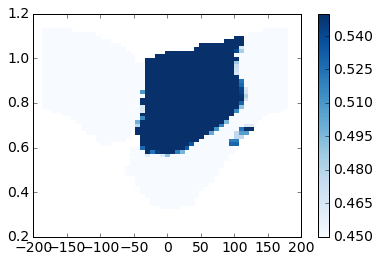

In [43]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,0],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

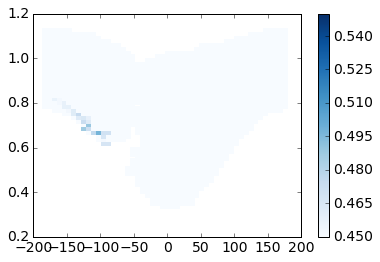

In [44]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,1],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

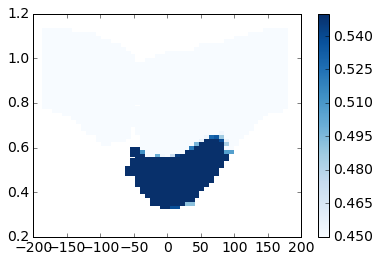

In [45]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,2],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

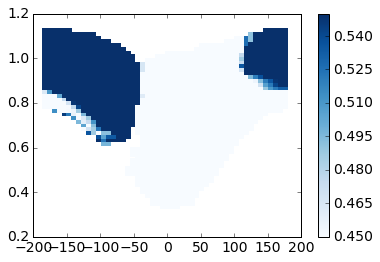

In [46]:
plt.scatter(bin_ctrs_x_trim, bin_ctrs_y_trim,s=100,c=membership[:,3],cmap='Blues',marker='s',linewidth=0.0,vmin=0.5,vmax=0.5)
plt.colorbar()
plt.show()

In [47]:
# define the metastable states by label
E2 = np.where(membership[:,0]>0.5)
E1 = np.where(membership[:,1]>0.5)
H = np.where(membership[:,2]>0.5)
I = np.where(membership[:,3]>0.5)

In [48]:
# make sure there is no overlap
check = [val for val in E2[0] if val in I[0]]
print check 
check = [val for val in E2[0] if val in E1[0]]
print check 
check = [val for val in E2[0] if val in H[0]]
print check 

[]
[]
[]


In [49]:
# get the grids for each set
xgrids_I, ygrids_I = label_to_bins(lcc_trim_AA[I[0]],ngridsx)
bin_ctrs_x_I, bin_ctrs_y_I = bins_to_values(xgrids_I, ygrids_I, bin_ctrs)

xgrids_E2, ygrids_E2 = label_to_bins(lcc_trim_AA[E2[0]],ngridsx)
bin_ctrs_x_E2, bin_ctrs_y_E2 = bins_to_values(xgrids_E2, ygrids_E2, bin_ctrs)

xgrids_H, ygrids_H = label_to_bins(lcc_trim_AA[H[0]],ngridsx)
bin_ctrs_x_H, bin_ctrs_y_H = bins_to_values(xgrids_H, ygrids_H, bin_ctrs)

xgrids_E1, ygrids_E1 = label_to_bins(lcc_trim_AA[E1[0]],ngridsx)
bin_ctrs_x_E1, bin_ctrs_y_E1 = bins_to_values(xgrids_E1, ygrids_E1, bin_ctrs)

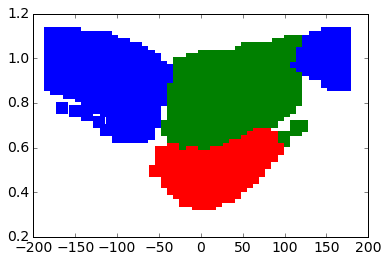

In [50]:
plt.scatter(bin_ctrs_x_I, bin_ctrs_y_I,color='b',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E2, bin_ctrs_y_E2,color='g',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_H, bin_ctrs_y_H,color='r',s=150,marker='s',linewidth=0.0)
plt.scatter(bin_ctrs_x_E1, bin_ctrs_y_E1,color='k',s=150,marker='s',linewidth=0.0)
plt.show()

In [51]:
#from pyemma.msm.analysis import mfpt
from msmtools.analysis import mfpt

In [52]:
m_t_H_I = mfpt(T_AA,I[0],origin=H[0])
m_t_H_E1 = mfpt(T_AA,E1[0],origin=H[0])
m_t_H_E2 = mfpt(T_AA,E2[0],origin=H[0])

m_t_I_E1 = mfpt(T_AA,E1[0],origin=I[0])
m_t_I_E2 = mfpt(T_AA,E2[0],origin=I[0])
m_t_I_H = mfpt(T_AA,H[0],origin=I[0])

m_t_E1_E2 = mfpt(T_AA,E2[0],origin=E1[0])
m_t_E1_I = mfpt(T_AA,I[0],origin=E1[0])
m_t_E1_H = mfpt(T_AA,H[0],origin=E1[0])

m_t_E2_E1 = mfpt(T_AA,E1[0],origin=E2[0])
m_t_E2_I = mfpt(T_AA,I[0],origin=E2[0])
m_t_E2_H = mfpt(T_AA,H[0],origin=E2[0])

/home/theorie/rudzinski/soft/anaconda/envs/PyEmma-new/lib/python2.7/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.04664894686e-19 / 1.11022302463e-16
  RuntimeWarning)


In [53]:
print m_t_H_I 
print m_t_H_E1 
print m_t_H_E2
print '\n'
print m_t_I_E1 
print m_t_I_E2 
print m_t_I_H 
print '\n'
print m_t_E1_E2 
print m_t_E1_I 
print m_t_E1_H 
print '\n'
print m_t_E2_E1 
print m_t_E2_I 
print m_t_E2_H 

32.78880134777574
1.7196014685214566e+17
18.480317629952843


1.7196014685214573e+17
40.94426850486383
71.79147675458435


0.0
0.0
0.0


1.719601468521457e+17
24.307299341669083
40.332686326012826
